Download the NF1 dataset

In [1]:
from IPython.display import Image, clear_output
!pip install gdown
clear_output()

import gdown
url = 'https://drive.google.com/drive/folders/1OKIJMYdoSP1X2dGga5NulHHi6AVmdubF?usp=sharing'
gdown.download_folder(url, quiet=True, use_cookies=False)

['/content/dataset/binary_nf1 (1).zip',
 '/content/dataset/binary_nf1.zip',
 '/content/dataset/binary_skin.zip',
 '/content/dataset/multiclass_skin_nf1.zip']

Unzip the zip files

In [2]:
!unzip -j dataset/binary_nf1\ \(1\).zip -d training_data_nf2/
!unzip dataset/binary_nf1.zip
!unzip dataset/binary_skin.zip
!unzip dataset/multiclass_skin_nf1.zip
clear_output()

transfer the json label files to yolov5 format files-txt.

In [3]:
import os
import numpy as np
from pathlib import Path
import json
def json_to_yolov5txt(dir):
  if not os.path.exists(dir+"labels"):
    os.mkdir(dir+"labels")
  if not os.path.exists(dir+"images"):
    os.mkdir(dir+"images")
  for file in os.listdir(dir):
    if file.endswith("jpg") or file.endswith("jpeg"):
      Path(dir+file).rename(dir+"images/"+file)
    if file.endswith("json"):
      with open(dir+file, 'r') as file_json , open(dir+"labels/"+file.split(".")[0]+".txt", 'w') as file_txt:
        data = json.load(file_json)
        shapes=data["shapes"]
        h=data['imageHeight']
        w=data['imageWidth']
        for shape in shapes:
          row="0 "+" ".join([" ".join(p.astype(str)) for p in np.array(shape["points"])/[w,h]])
          file_txt.write(row + "\n")

json_to_yolov5txt("training_data_skin/")
json_to_yolov5txt("training_data_nf1/")
json_to_yolov5txt("training_data_nf2/")

Download the Yolov5 codes

In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 9.69 MiB/s, done.
Resolving deltas: 100% (11695/11695), done.


create directory inside /yolov5 folder for custom dataset

In [5]:
!mkdir -p yolov5/train/images yolov5/train/labels

move the custom dataset NF1 to the directory just created

In [6]:
Path("training_data_skin/images").rename("yolov5/train/images")
Path("training_data_skin/labels").rename("yolov5/train/labels")

PosixPath('yolov5/train/labels')

Enter yolov5 folder, install dependency marked in the requirements.txt, uninstall some library called wandb, which is suggested to be uninstalled from the artical I read in google

In [7]:
%cd yolov5
!pip install -r requirements.txt
!pip uninstall wandb -qy
clear_output()
import torch

create a data.yaml file indicating the information of the dataset. The data.yaml need to be used while training

In [8]:
data_yaml='''train: ../train/images
val: ../train/images

nc: 2
names: ['NF1', 'skin']
'''
with open("data.yaml", "w") as file:
    file.write(data_yaml)

start the training program

In [ ]:
#yolov5s-seg.pt \
!python segment/train.py \
  --img 320 \ #set the input image to be 320*320
  --batch 32 \ #each time train 32 images together
  --epochs 1 \ #train 1 epoch/iteration in total
  --data data.yaml \
  --weights yolov5s-seg.pt \#pretrained model
  --name nf1-dataset \
  --cache

unfortunately I haven't save any trained model since the accuracies were not as good as I wanted, so I could show a example prediction of other objects that used to pretrain the yolov5 pretrained model

segment/predict: weights=['yolov5s-seg.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-378-g2f74455a Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 923.8ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, 635.1ms
Speed: 5.9ms pre-process, 779.4ms inference, 2.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/exp2


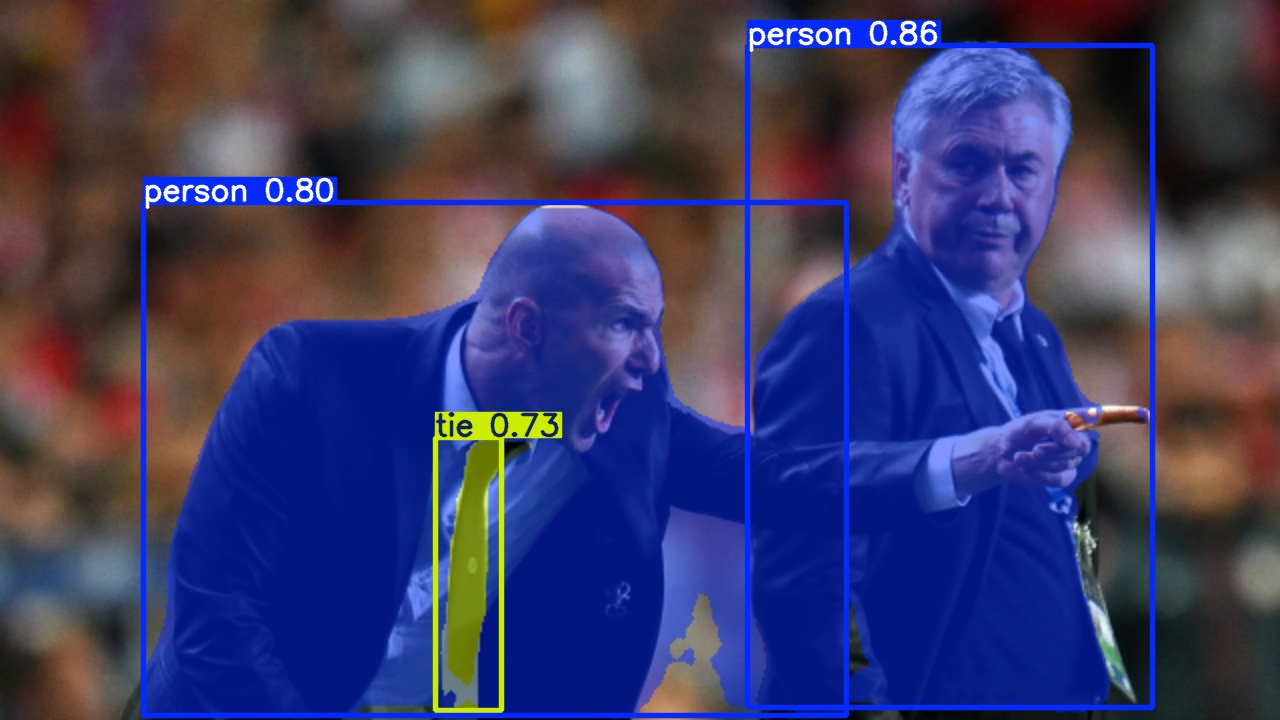

In [14]:
!python segment/predict.py --weights yolov5s-seg.pt --img 640 --conf 0.25 --source data/images
Image(filename='runs/predict-seg/exp/zidane.jpg', width=600)